In [2]:
import numpy as np
import matplotlib.pyplot as plt

# CO2 Sequestration

(0.0, 1.0)

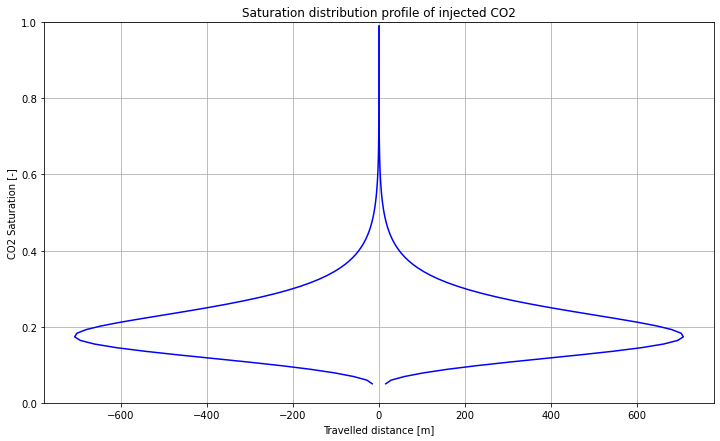

In [4]:
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]

mu_co2=0.016                          # CO2 viscosity [mPa.s]
mu_w=0.5                              # water viscosity [mPa.s]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
i_co2 = 0.30                      # Injection rate (CO2) [m^3/day]
t = 1461                       # Duration of injection [days]

S_co2 = np.linspace(Sco2,0.99,100)       # CO2 saturation [-]
Sw = np.linspace(0.99,0.166,100)         # Water saturation [-]


L = 500

krco2_Swc=0.84                #krco2_Swc=((1-Swc)/(1-Swc))**n
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*((1-Sw_Star)**2)*(1-((Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

M=(krco2*mu_w)/(mu_co2*krw)
#M=(krco2/mu_co2)*(mu_w/krw)     # Mobility Ratio [-]
f_co2 = M/(M+1)                  # Water frational flow
df_co2 = np.gradient(f_co2,S_co2)              # Derivative of water fractional flow [-] 
x = i_co2*t/(A*phi)*df_co2

df_co2_neg = -np.gradient(f_co2,S_co2)               
x_neg = i_co2*t/(A*phi)*df_co2_neg

# ===================================Plot===================================
plt.figure(figsize=(12,7))
plt.plot(x,S_co2,'b-',x_neg,S_co2,'b-')
plt.xlabel('Travelled distance [m]')
plt.ylabel('CO2 Saturation [-]')
plt.title('Saturation distribution profile of injected CO2')
plt.grid()
#plt.xlim(0,15)
plt.ylim(0,1.0)

# Fractional Flow

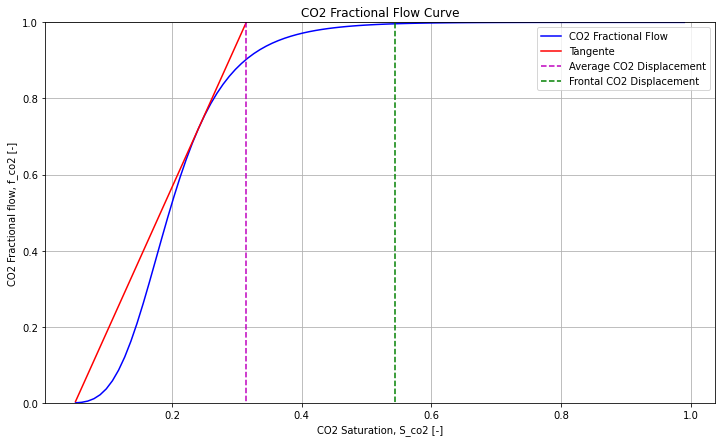

In [5]:
# ========Plotting the Fractional flow curve and its tangent===============
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]

mu_co2=0.016                          # CO2 viscosity [mPa.s]
mu_w=0.5                              # water viscosity [mPa.s]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
i_co2 = 0.20                      # Injection rate (CO2) [m^3/day]
t = 1461                       # Duration of injection [days]

S_co2 = np.linspace(0.051,0.99,100)     # CO2 saturation [-]
Sw = np.linspace(0.99,0.166,100)       # Water saturation [-]

L = 500

krco2_Swc=0.84                #krco2_Swc=((1-Swc)/(1-Swc))**n
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*((1-Sw_Star)**2)*(1-((Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

M=(krco2*mu_w)/(mu_co2*krw)     # Mobility Ratio [-]
f_co2 = M/(M+1)                  # Water frational flow
df_co2 = np.gradient(f_co2,S_co2)              # Derivative of CO2 fractional flow [-] 
x = i_co2*t/(A*phi)*df_co2

#===============================Tangent=================================
a=f_co2/(S_co2-Sco2)               # a is the slope df_CO2/dS_co2
a_max=np.max(a)              #   a_max Maximal value of vector a
tang = (a_max)*(S_co2-Sco2)     # Tangent in the form of y=a_max*Sw-a_max*Swc
ptr=np.argmax(a)           # Finding the position of the element equal
                              # to a_max in the vector a.
S_co2F = S_co2[52]                         # Water saturation at the front [-]    
f_co2F = a_max*(S_co2F-Sco2)                 # CO2 fractional flow at the front [-]  

S_co2AV= (S_co2F+Sco2*(f_co2F-1))/(f_co2F)         # Average CO2 saturation

# ===================================Plot===================================
xS_co2F = np.linspace(S_co2F,S_co2F,100) 
yS_co2F = np.linspace(f_co2F,0,100)
xS_co2AV= np.linspace(S_co2AV,S_co2AV,100)
yf_co2AV= np.linspace(1,0,100)
xf_co2F=  np.linspace(0,S_co2F,100)
yf_co2F=  np.linspace(f_co2F,f_co2F,100)

plt.figure(figsize=(12,7))
plt.plot(S_co2,f_co2,'b',label="CO2 Fractional Flow")
plt.plot(S_co2,tang,'r',label="Tangente")
plt.plot(xS_co2AV,yf_co2AV,'m--',label="Average CO2 Displacement")
plt.plot(xS_co2F,yS_co2F,'g--',label="Frontal CO2 Displacement")
plt.xlabel('CO2 Saturation, S_co2 [-]')
plt.ylabel('CO2 Fractional flow, f_co2 [-]')
plt.title('CO2 Fractional Flow Curve')
plt.ylim(0,1)
plt.legend(loc="upper right")
plt.grid()

# Displacement profile of injected CO2 under Stabilised Front

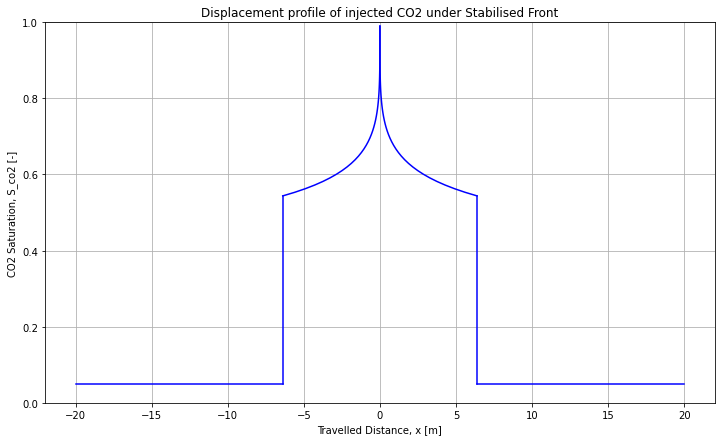

In [16]:
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]

mu_co2=0.016                          # CO2 viscosity [mPa.s]
mu_w=0.5                              # water viscosity [mPa.s]

phi = 0.15                     # Porosity [-]
A = 25                         # Cross-sectional area [m^2]
i_co2 = 0.3                      # Injection rate (CO2) [m^3/day]
t = 1461                       # Duration of injection [days]

S_co2 = np.linspace(Sco2,0.99,100)       # CO2 saturation [-]
Sw = np.linspace(0.99,0.166,100)         # Water saturation [-]


L = 20

krco2_Swc=0.84                #krco2_Swc=((1-Swc)/(1-Swc))**n
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*((1-Sw_Star)**2)*(1-((Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

M=(krco2*mu_w)/(mu_co2*krw)
#M=(krco2/mu_co2)*(mu_w/krw)     # Mobility Ratio [-]
f_co2 = M/(M+1)                  # Water frational flow
df_co2 = np.gradient(f_co2,S_co2)              # Derivative of water fractional flow [-] 
x = i_co2*t/(A*phi)*df_co2

df_co2_neg = -np.gradient(f_co2,S_co2)              
x_neg = i_co2*t/(A*phi)*df_co2_neg

#===============================At Front=================================
xF = x[52]                 # CO2 position at the front [m]
vF = xF/t                  # CO2 velocity at the front [m/day]
S_co2F = S_co2[52]               #  CO2 saturation at the front [-]
f_co2F = a_max*(S_co2F-Sco2)       # CO2 fractional flow at the front [-]

xG=x[52:100]
S_co2G=S_co2[52:100]

xG_neg=x_neg[52:100]
xF_neg = x_neg[52]                 # CO2 position at the front [m]

# ===========================At Breakthrough=============================
PV=(phi*A*L)                  #  Total flooded pattern Pore Volume [m^3]
t_BT=(PV)/(i_co2*df_co2[52])        #  Breakthrough time [days]
PV2=1/df_co2[52]
# =============================Average Sw===================================
S_co2AV=(S_co2F+Sco2*(f_co2F-1))/(f_co2F);     # Average CO2 saturation [-]

# ========================Recovery Factor at BT=============================
EDBT = (S_co2AV-Sco2)/(1-Sco2)    # Displacement efficiency @ BT [-]
WiBT = t_BT*i_co2               # Cumulative CO2 injection @ BT [m^3]

## ===================================Plot===================================
xS_co2F = np.linspace(xF,xF,100)
yS_co2F = np.linspace(S_co2F,Sco2,100)
xSco2 = np.linspace(xF,L,100)
ySco2 = np.linspace(Sco2,Sco2,100)

xS_co2F_neg = np.linspace(xF_neg,xF_neg,100)
yS_co2F_neg = np.linspace(S_co2F,Sco2,100)
xSco2_neg = np.linspace(xF_neg,-L,100)
ySco2_neg = np.linspace(Sco2,Sco2,100)

xS_co2AV= np.linspace(0,L,100)
yS_co2AV= np.linspace(1-Swc,S_co2AV,100)
xAV= np.linspace(L,L,100)
yAV=np.linspace(S_co2AV,Sco2,100)

plt.figure(figsize=(12,7))
plt.plot(xG,S_co2G,'b',xS_co2F,yS_co2F,'b-',xSco2,ySco2,'b-')
plt.plot(xG_neg,S_co2G,'b',xS_co2F_neg,yS_co2F_neg,'b-',xSco2_neg,ySco2_neg,'b-')

plt.title('Displacement profile of injected CO2 under Stabilised Front')
plt.xlabel('Travelled Distance, x [m]')
plt.ylabel('CO2 Saturation, S_co2 [-]')
#plt.xlim(0,500)
plt.ylim(0,1)
plt.grid()

# Relative Permeability

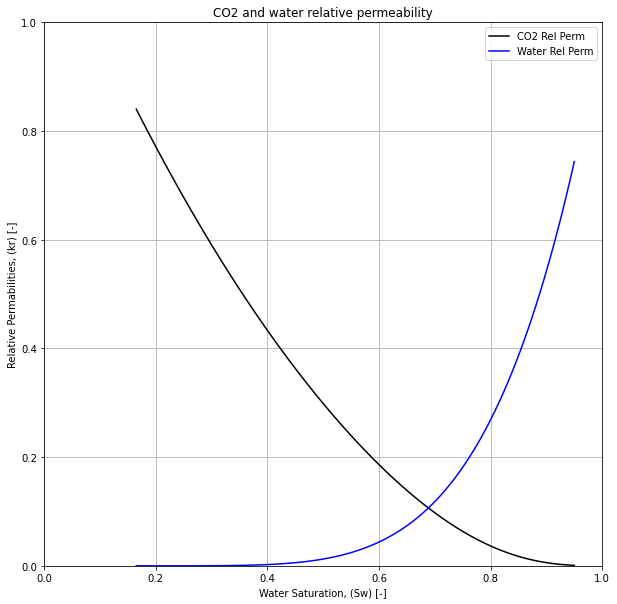

In [3]:
#=====================Relative permeabilities==============================
Swc = 0.165                          # Connate water saturation [-]
Sco2 = 0.05                          # Residual CO2 saturation [-]
Sw = np.linspace(Swc,1-Sco2,100)       # Water saturation [-]

                                #krco2_Swc=((1-Swc)/(1-Swc))**n
krco2_Swc=0.84
Sw_Star=((Sw-Swc)/(1-Swc))
n=5.167                        #      Corey's CO2 exponent [-]
m=4.8                        #      Corey's water exponent [-]
krco2 = (krco2_Swc)*((1-Sw_Star)**2)*(1-((Sw_Star)**n))     # CO2 relative permeability
krw = (Sw_Star)**m             # Water relative permeability

#==================================Plot====================================
plt.figure(figsize=(10,10))

plt.plot(Sw,krco2,'k-',label="CO2 Rel Perm")
plt.plot(Sw,krw,'b-',label="Water Rel Perm")
plt.xlabel('Water Saturation, (Sw) [-]')
plt.ylabel('Relative Permabilities, (kr) [-]')
plt.title('CO2 and water relative permeability')

plt.legend(loc="upper right")

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()